# Gaussian Blur kernel size test

In [1]:
import random
import numpy
from datetime import datetime
from src.data.ParkingProvider import NoSpacesException, NoImageException
from src.metrics.PerformanceMetricsProviderSklearn import PerformanceMetricsProviderSklearn
from src.metrics.entity.PerformanceMetrics import PerformanceMetrics
from src.detector.entity.DetectionParams import DetectionParams
from src.data.ParkingProviderLocal import ParkingProviderLocalParams,ParkingProviderLocal
from src.app.ParkingOccupancyProcessorLocal import ParkingOccupancyProcessorLocal
from src.detector.OccupancyDetectorBorders import OccupancyDetectorBorders
import cv2 as cv

metrics_list = list()
row_names = list()
random_seed = datetime.now().timestamp
 
def test_parking(parking_id, detection_params:DetectionParams, row_name, process_batch=True):
    metrics_provider: PerformanceMetricsProviderSklearn = PerformanceMetricsProviderSklearn()

    provider_params = ParkingProviderLocalParams(
    parking_id=parking_id, path='E:\\Documents\\PKLot\\PKLot\\PKLot\\PKLot\\'+parking_id, k=4, random_seed=random_seed)
    
    processor = ParkingOccupancyProcessorLocal(
        parking_provider_params=provider_params, detection_params=detection_params, performance_metrics_provider=metrics_provider)

    if process_batch:
        try:
            detection_params.show_imshow=False
            processor.process_batch()
        except (NoSpacesException, NoImageException) as ex:
            print(f"Finished processing samples: ", ex)

    else:
        while True:
            try:
                processor.process()
            except (NoSpacesException, NoImageException) as ex:
                print(f"Finished processing samples: ", ex)
                break
        
    metrics_provider.calculate_metrics()
    metrics_provider.show_confusion_matrix()

    metrics_list.append(metrics_provider.metrics)
    row_names.append(row_name)
    
def test_gbk(parking_id, detection_params:DetectionParams, gbk_list):
    
    for gbk in gbk_list:
        
        row_name = f'{parking_id} gbk={gbk}'
        print('Testing ', row_name)
        
        detection_params.gb_k = gbk
        test_parking(parking_id, detection_params, row_name)
        
    PerformanceMetricsProviderSklearn.show_dataframe(metrics_list, row_names)
        

## UFPR04

Testing  UFPR04 gbk=None
Processing 947 files with 16 cores


100%|██████████| 947/947 [03:28<00:00,  4.54it/s]


Precision: 0.896
specificity: 0.900
Recall: 0.653
F1 Score: 0.755
Accuracy: 0.760


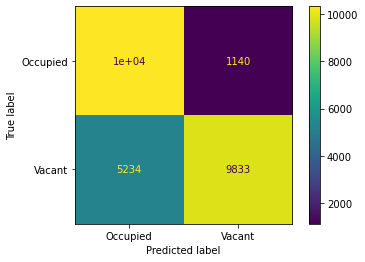

Testing  UFPR04 gbk=(3, 3)
Processing 947 files with 16 cores


100%|██████████| 947/947 [02:43<00:00,  5.79it/s]

Precision: 0.879
specificity: 0.873
Recall: 0.669
F1 Score: 0.760
Accuracy: 0.754


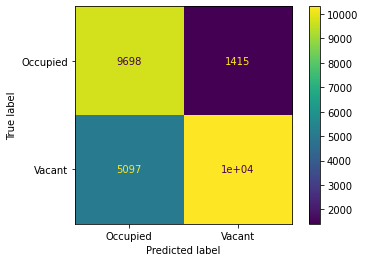

Testing  UFPR04 gbk=(5, 5)
Processing 947 files with 16 cores


100%|██████████| 947/947 [02:23<00:00,  6.58it/s]

Precision: 0.865
specificity: 0.870
Recall: 0.697
F1 Score: 0.772
Accuracy: 0.775


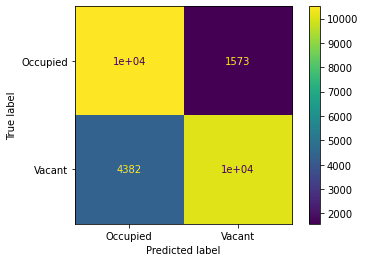

Testing  UFPR04 gbk=(7, 7)
Processing 947 files with 16 cores


100%|██████████| 947/947 [01:52<00:00,  8.45it/s]

Precision: 0.866
specificity: 0.844
Recall: 0.773
F1 Score: 0.817
Accuracy: 0.804


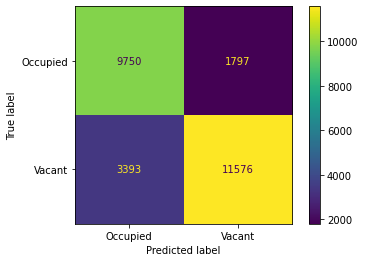

Testing  UFPR04 gbk=(9, 9)
Processing 947 files with 16 cores


100%|██████████| 947/947 [01:33<00:00, 10.14it/s]


Precision: 0.821
specificity: 0.779
Recall: 0.771
F1 Score: 0.795
Accuracy: 0.774


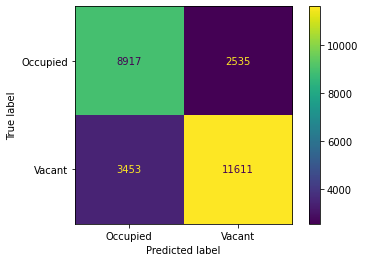

Testing  UFPR04 gbk=(13, 13)
Processing 947 files with 16 cores


100%|██████████| 947/947 [01:04<00:00, 14.61it/s]

Precision: 0.800
specificity: 0.700
Recall: 0.796
F1 Score: 0.798
Accuracy: 0.758


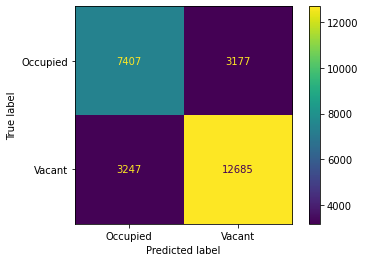

Testing  UFPR04 gbk=(21, 21)
Processing 947 files with 16 cores


100%|██████████| 947/947 [00:34<00:00, 27.55it/s]


Precision: 0.631
specificity: 0.395
Recall: 0.805
F1 Score: 0.707
Accuracy: 0.625


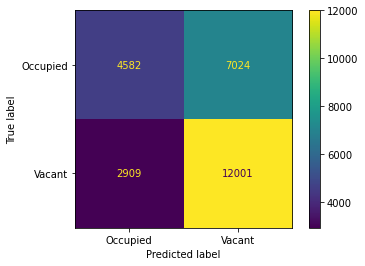

                     precision  specificity  recall     f1  accuracy
UFPR04 gbk=None          0.904        0.905   0.638  0.748     0.750
UFPR04 gbk=(3, 3)        0.882        0.875   0.674  0.764     0.759
UFPR04 gbk=(5, 5)        0.887        0.881   0.713  0.790     0.785
UFPR04 gbk=(7, 7)        0.850        0.820   0.752  0.798     0.781
UFPR04 gbk=(9, 9)        0.838        0.777   0.772  0.804     0.774
UFPR04 gbk=None          0.896        0.900   0.653  0.755     0.760
UFPR04 gbk=(3, 3)        0.879        0.873   0.669  0.760     0.754
UFPR04 gbk=(5, 5)        0.865        0.870   0.697  0.772     0.775
UFPR04 gbk=(7, 7)        0.866        0.844   0.773  0.817     0.804
UFPR04 gbk=(9, 9)        0.821        0.779   0.771  0.795     0.774
UFPR04 gbk=(13, 13)      0.800        0.700   0.796  0.798     0.758
UFPR04 gbk=(21, 21)      0.631        0.395   0.805  0.707     0.625


In [3]:
PARAMS_UFPR04 = DetectionParams((5, 5), 0, cv.ADAPTIVE_THRESH_GAUSSIAN_C, at_blockSize=31, at_C=10, median_k=3, bw_size=50, vacant_threshold=0.23, show_imshow=True)  # UFPR04
test_gbk('UFPR04', PARAMS_UFPR04, [None, (3,3), (5,5), (7,7), (9,9), (13,13), (21,21)])

## UFPR05

Testing  UFPR05 gbk=None
Selected 1038 files
Processing 1038 files with 16 workers


100%|██████████| 1038/1038 [03:16<00:00,  5.29it/s]


Precision: 0.868
specificity: 0.926
Recall: 0.740
F1 Score: 0.799
Accuracy: 0.852


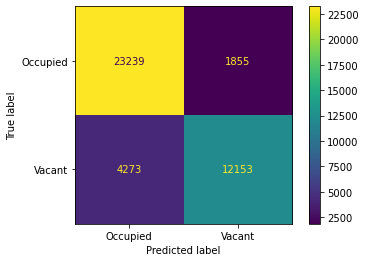

Testing  UFPR05 gbk=(3, 3)
Selected 1038 files
Processing 1038 files with 16 workers


100%|██████████| 1038/1038 [02:34<00:00,  6.72it/s]


Precision: 0.857
specificity: 0.914
Recall: 0.785
F1 Score: 0.819
Accuracy: 0.863


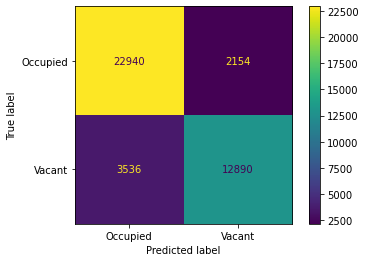

Testing  UFPR05 gbk=(5, 5)
Selected 1038 files
Processing 1038 files with 16 workers


100%|██████████| 1038/1038 [02:07<00:00,  8.14it/s]


Precision: 0.845
specificity: 0.901
Recall: 0.826
F1 Score: 0.835
Accuracy: 0.871


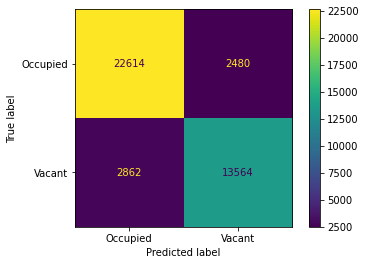

Testing  UFPR05 gbk=(7, 7)
Selected 1038 files
Processing 1038 files with 16 workers


100%|██████████| 1038/1038 [01:37<00:00, 10.65it/s]


Precision: 0.827
specificity: 0.879
Recall: 0.882
F1 Score: 0.853
Accuracy: 0.880


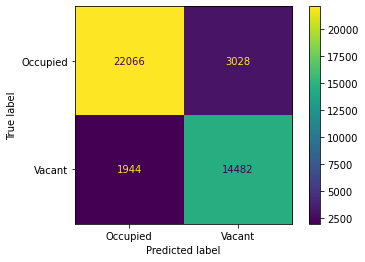

Testing  UFPR05 gbk=(9, 9)
Selected 1038 files
Processing 1038 files with 16 workers


100%|██████████| 1038/1038 [01:19<00:00, 13.02it/s]


Precision: 0.807
specificity: 0.856
Recall: 0.918
F1 Score: 0.859
Accuracy: 0.881


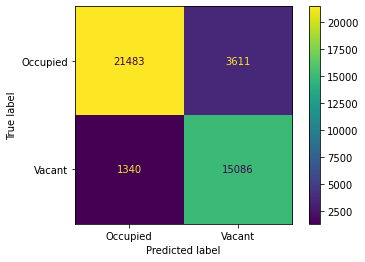

Testing  UFPR05 gbk=(13, 13)
Selected 1038 files
Processing 1038 files with 16 workers


100%|██████████| 1038/1038 [00:53<00:00, 19.28it/s]


Precision: 0.751
specificity: 0.790
Recall: 0.964
F1 Score: 0.844
Accuracy: 0.859


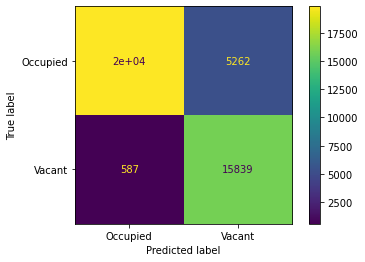

Testing  UFPR05 gbk=(21, 21)
Selected 1038 files
Processing 1038 files with 16 workers


100%|██████████| 1038/1038 [00:29<00:00, 34.94it/s]


Precision: 0.612
specificity: 0.587
Recall: 0.995
F1 Score: 0.758
Accuracy: 0.749


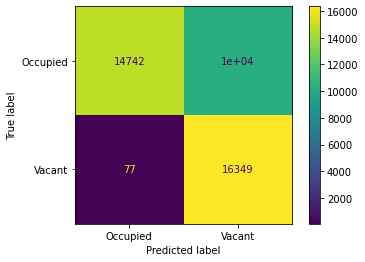

                     precision  specificity  recall     f1  accuracy
PUCPR gbk=None           0.919        0.914   0.873  0.896     0.893
PUCPR gbk=(3, 3)         0.919        0.911   0.895  0.907     0.903
PUCPR gbk=(5, 5)         0.916        0.905   0.921  0.918     0.914
PUCPR gbk=(7, 7)         0.911        0.895   0.955  0.932     0.927
PUCPR gbk=(9, 9)         0.903        0.882   0.971  0.935     0.929
PUCPR gbk=(13, 13)       0.871        0.836   0.989  0.927     0.917
PUCPR gbk=(21, 21)       0.758        0.642   0.997  0.861     0.830
UFPR05 gbk=None          0.868        0.926   0.740  0.799     0.852
UFPR05 gbk=(3, 3)        0.857        0.914   0.785  0.819     0.863
UFPR05 gbk=(5, 5)        0.845        0.901   0.826  0.835     0.871
UFPR05 gbk=(7, 7)        0.827        0.879   0.882  0.853     0.880
UFPR05 gbk=(9, 9)        0.807        0.856   0.918  0.859     0.881
UFPR05 gbk=(13, 13)      0.751        0.790   0.964  0.844     0.859
UFPR05 gbk=(21, 21)      0.612    

In [5]:
PARAMS_UFPR05 = DetectionParams(gb_k=(5, 5), gb_s=0, at_method=cv.ADAPTIVE_THRESH_GAUSSIAN_C, at_blockSize=33, at_C=7, median_k=3, bw_size=85, vacant_threshold=0.3, show_imshow=False)
test_gbk('UFPR05', PARAMS_UFPR05, [None, (3,3), (5,5), (7,7), (9,9), (13,13), (21,21)])

## PUCPR

Testing  PUCPR gbk=None
Selected 1118 files
Processing 1118 files with 16 workers


100%|██████████| 1118/1118 [04:24<00:00,  4.23it/s]


Precision: 0.919
specificity: 0.914
Recall: 0.873
F1 Score: 0.896
Accuracy: 0.893


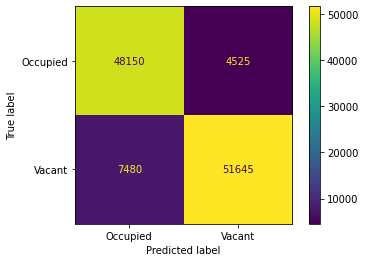

Testing  PUCPR gbk=(3, 3)
Selected 1118 files
Processing 1118 files with 16 workers


100%|██████████| 1118/1118 [03:35<00:00,  5.19it/s]


Precision: 0.919
specificity: 0.911
Recall: 0.895
F1 Score: 0.907
Accuracy: 0.903


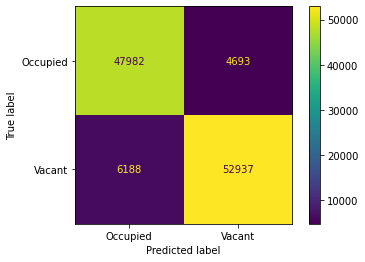

Testing  PUCPR gbk=(5, 5)
Selected 1118 files
Processing 1118 files with 16 workers


100%|██████████| 1118/1118 [03:01<00:00,  6.17it/s]


Precision: 0.916
specificity: 0.905
Recall: 0.921
F1 Score: 0.918
Accuracy: 0.914


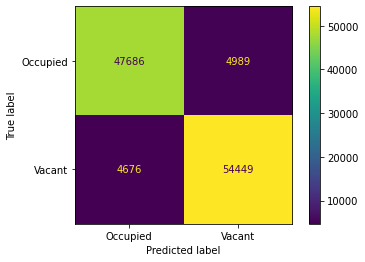

Testing  PUCPR gbk=(7, 7)
Selected 1118 files
Processing 1118 files with 16 workers


100%|██████████| 1118/1118 [02:23<00:00,  7.77it/s]


Precision: 0.911
specificity: 0.895
Recall: 0.955
F1 Score: 0.932
Accuracy: 0.927


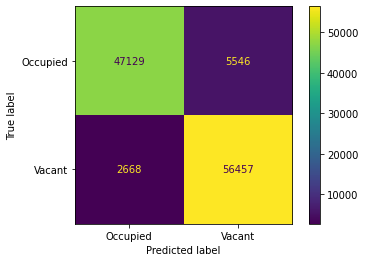

Testing  PUCPR gbk=(9, 9)
Selected 1118 files
Processing 1118 files with 16 workers


100%|██████████| 1118/1118 [02:06<00:00,  8.82it/s]


Precision: 0.903
specificity: 0.882
Recall: 0.971
F1 Score: 0.935
Accuracy: 0.929


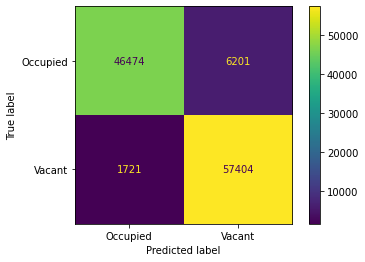

Testing  PUCPR gbk=(13, 13)
Selected 1118 files
Processing 1118 files with 16 workers


100%|██████████| 1118/1118 [01:23<00:00, 13.34it/s]


Precision: 0.871
specificity: 0.836
Recall: 0.989
F1 Score: 0.927
Accuracy: 0.917


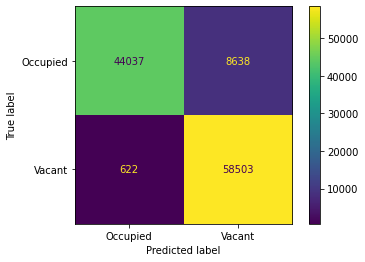

Testing  PUCPR gbk=(21, 21)
Selected 1118 files
Processing 1118 files with 16 workers


100%|██████████| 1118/1118 [00:40<00:00, 27.56it/s]


Precision: 0.758
specificity: 0.642
Recall: 0.997
F1 Score: 0.861
Accuracy: 0.830


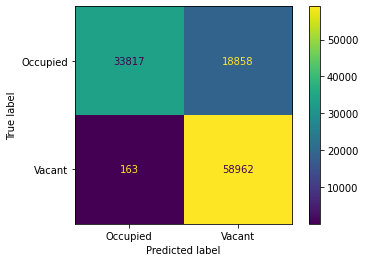

                    precision  specificity  recall     f1  accuracy
PUCPR gbk=None          0.919        0.914   0.873  0.896     0.893
PUCPR gbk=(3, 3)        0.919        0.911   0.895  0.907     0.903
PUCPR gbk=(5, 5)        0.916        0.905   0.921  0.918     0.914
PUCPR gbk=(7, 7)        0.911        0.895   0.955  0.932     0.927
PUCPR gbk=(9, 9)        0.903        0.882   0.971  0.935     0.929
PUCPR gbk=(13, 13)      0.871        0.836   0.989  0.927     0.917
PUCPR gbk=(21, 21)      0.758        0.642   0.997  0.861     0.830


In [4]:
PARAMS_PUCPR = DetectionParams(gb_k=(5, 5), gb_s=0, at_method=cv.ADAPTIVE_THRESH_GAUSSIAN_C, at_blockSize=27, at_C=7, median_k=3, bw_size=85, vacant_threshold=0.28, show_imshow=False)
test_gbk('PUCPR', PARAMS_PUCPR, [None, (3,3), (5,5), (7,7), (9,9), (13,13), (21,21)])